### Problem 1

We are charged with the task of finding the root of the following function: <br>
$$f(x) = c^x - xc^x$$

Later we will be testing various methods, but for now, we can use the
scipy.optimize library to find the root using the bisection method.

In [2]:
from scipy.optimize import bisect
import numpy as np

def g(y):
    return np.e**y - y * np.e**y

def gprime(y):
    return -1 * np.e**y * y

print("maximal value of f(x) can be found at:", bisect(g, -1, 1))

maximal value of f(x) can be found at: 1.0


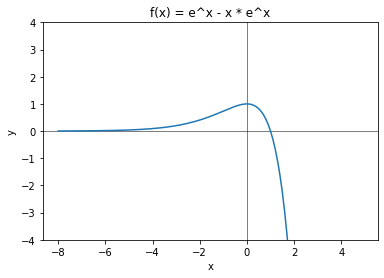

In [3]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(-8, 5, .1)

fig, ax = plt.subplots()

ax.set_ylim(ymin=-4.0, ymax=4)

ax.axhline(y=0, color="black", linewidth=.5)
ax.axvline(x=0, color="black", linewidth=.5)

plt.xlabel("x")
plt.ylabel("y")
plt.title("f(x) = e^x - x * e^x")

ax.plot(t, g(t))


Nice, This can be confirmed by looking at a plot of the function, something I
did on desmos instead of showing here :)

Now we want to check and see how finding these points goes using the other
methods in the scipy library. We will use arrays of points, and run them through
the different root solving methods to determine which are better, faster, or
generally nice for this particular choice of function.

~~perhaps this code is exposing me as a primarily C programmer~~

In [32]:
from scipy.optimize import newton

## array storing values for each method
new_p = [.5, 2, 10, -.5, -5]
sec_p = [(0,2), (0,10), (-1,2), (-5,5), (-10,2)]
bis_p = [(0,2), (-5,5), (-10,2), (-1,2), (0,1)]

## empty arrays for holding solved roots
bis_r = []
new_r = []
sec_r = []

## handy print function for comparing points to values
def p_arrays(point, val):
    for i in range(len(point)):
        if(isinstance(val[i][1], str)):
            print(point[i], " " + "\t->", val[i][0])
        else:
            print(point[i], " " + "\t->", val[i][0], "@iter =", val[i][1].iterations)
    print()

## bisection method -- there were no errors here, no need to try except
print("results for points in bis_p after bisection: ")
for i in range(len(bis_p)):
    bis_r.append(bisect(g, bis_p[i][0], bis_p[i][1], full_output=True))
p_arrays(bis_p, bis_r)


## secant method -- errors logged, unknown source
print("reults for points in sec_p after secant method:")
for i in range(len(sec_p)):
    try:
        sec_r.append(newton(g, sec_p[i][0], x1=sec_p[i][1], maxiter=100, full_output=True))
    except:
        sec_r.append("err")
p_arrays(sec_p, sec_r)

## newtons method, errors accounted for
print("results for points in new_p after newtons method:")
for i in range(len(new_p)):
    try:
        new_r.append(newton(g, new_p[i], gprime, maxiter=100, full_output=True))
    except:
        new_r.append("err")
p_arrays(new_p, new_r)





results for points in bis_p after bisection: 
(0, 2)  	-> 1.0 @iter = 1
(-5, 5)  	-> 1.0000000000002274 @iter = 43
(-10, 2)  	-> 0.9999999999995453 @iter = 43
(-1, 2)  	-> 0.9999999999995453 @iter = 41
(0, 1)  	-> 1.0 @iter = 41

reults for points in sec_p after secant method:
(0, 2)  	-> 1.0 @iter = 13
(0, 10)  	-> e
(-1, 2)  	-> e
(-5, 5)  	-> e
(-10, 2)  	-> e

results for points in new_p after newtons method:
0.5  	-> 1.0 @iter = 7
2  	-> 1.0 @iter = 7
10  	-> 1.0 @iter = 17
-0.5  	-> e
-5  	-> e



We can see the inital paramters have a large impact on finding the roots for
each of the three methods. For instance, the secant method seems to be
particularly finicky when the range is too large. This likely has to do with the
range of values surrounding the peak, without actually being enough on it for
the points to find it.

### Problem 2

This is a linear programming problem, where we wish to find the maximal value of
the given system by two means. One, by sketching the feasible space of the
system,and testing it's intersection points for maximal values, and the other,
by utilizing the `scipy.linprog` library

The first method, will require us to use matplotlib to sketch the feasible
space, as is shown below

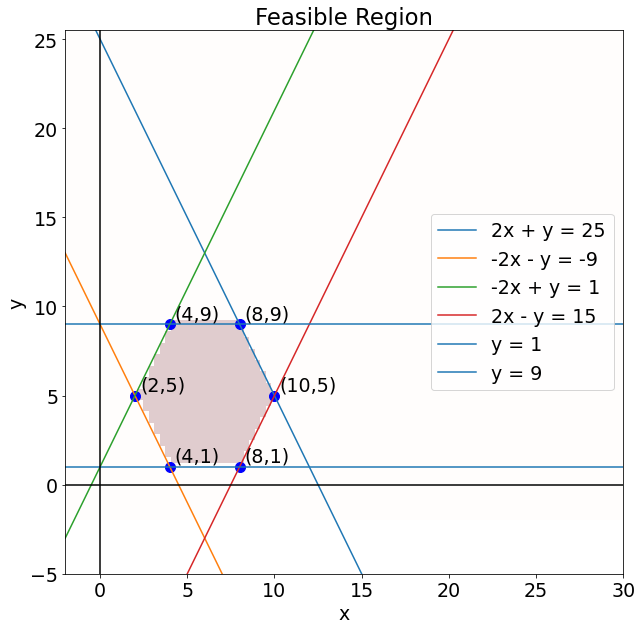

In [17]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt


plt.rcParams.update({'font.size': 19})

d = np.linspace(-2,30,100)
x,y = np.meshgrid(d,d)

pl = plt.figure(figsize=(10,10))
ax = plt.axes()

ax.imshow(((y <= 9) & (y >= 1) & (2*x + y <= 25) & (-2*x - y <= -9) & (-2*x + y <= 1) & (2*x - y <= 15)).astype(int),
          extent    = (x.min(),x.max(),y.min(),y.max()),
          origin    = "lower", 
          cmap      = "Reds", 
          alpha     =  0.2,
          aspect    = "auto")

# plot the lines defining the constraints
x = np.arange(-2, 30, .1)
ax.plot(x, 25 - x*2, label = "2x + y = 25")
ax.plot(x, 9 - 2*x,  label = "-2x - y = -9")
ax.plot(x, 1 + 2*x,   label = "-2x + y = 1")
ax.plot(x, 2*x - 15,  label = "2x - y = 15")

ax.axhline(y=9, label = "y = 1")
ax.axhline(y=1, label = "y = 9")

ax.axhline(y=0, color = "black")
ax.axvline(x=0, color = "black")
ax.set_ylim(ymin=-5.0, ymax=25.5)

ax.legend()
ax.set_title("Feasible Region")
ax.set_xlabel("x")
ax.set_ylabel("y")

def ann_pt(x,y):
    s = f"({x},{y})"
    ax.annotate(s,xy=(x,y),xytext=(5,5),textcoords='offset points')

ax.scatter(4, 9,s=100,color="blue")
ax.scatter(8, 9,s=100,color="blue")
ax.scatter(8, 1,s=100,color="blue")
ax.scatter(10, 5,s=100,color="blue")
ax.scatter(4, 1,s=100,color="blue")
ax.scatter(2, 5,s=100,color="blue")

ann_pt(4, 9)
ann_pt(8, 9)
ann_pt(8, 1)
ann_pt(10, 5)
ann_pt(4, 1)
ann_pt(2,5)




Now that we have this plot, and the intersection points (I just manually
calculated the intersection points to avoid writing a function for such a basic
task), we can find the maximal point by writing a slightly inefficient chunk of
code here...

In [24]:
m = (0,0)
m_points = [(4, 9), (2,5), (8,9), (10,5), (8,1), (4,1)]
m_values = []

def f(x,y):
    return x + 2*y

for i in range(len(m_points)):
    print("point:", m_points[i], "\tval:", f(m_points[i][0], m_points[i][1]))
    m_values.append(f(m_points[i][0], m_points[i][1]))

print()

m = m_points[m_values.index(max(m_values))]
print("maximal value is:", max(m_values))
print("maximal value found at:", m)

point: (4, 9) 	val: 22
point: (2, 5) 	val: 12
point: (8, 9) 	val: 26
point: (10, 5) 	val: 20
point: (8, 1) 	val: 10
point: (4, 1) 	val: 6

maximal value is: 26
maximal value found at: (8, 9)


We can verify this value by using the Scipy optimize library

In [7]:
from scipy.optimize import linprog

A = np.array([[ 0,  1],
              [ 0, -1],
              [ 2,  1],
              [-2, -1],
              [-2,  1],
              [ 2, -1]])
b = np.array([9, -1, 25, -9, 1, 15])

c=np.array([1, 2])

# note the -1 in front of the c as linprog can only minimize (the same as
# maximizing the negative)
res = linprog(-1*c, A_ub=A, b_ub=b)
print(res)

     con: array([], dtype=float64)
     fun: -25.999999999969482
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([9.36140054e-12, 8.00000000e+00, 3.29478667e-11, 1.60000000e+01,
       8.00000000e+00, 8.00000000e+00])
  status: 0
 success: True
       x: array([8., 9.])


We can see that the two methods, are in complete agreement up to computational accuracy

### Problem 3

We are given the following problem: <br>

> A bakery wants to sell forty five Valentine’s Day gift bags. They have decided to offer two
types of bags: Bags of type A will contain four of cupcakes and two cookies, and bags of
type B will contain two cupcakes and five cookies. Baskets of type A will be sold for $12
and baskets of type B will be sold for $16. The bakery has 90 cookies and 115 cupcakes in
total. <br>

We would like to optimize the profits of this baker. <br>

We can start by finding our objective function, which is clearly as follows:

$$P(a,b)=12a + 16b$$

We can then construct a table to better understand our constraints... <br>

|           | cupcakes (c)  | cookies (k)   |
|:----------|:-------------:|--------------:|
| Basket A  |       4       |       2       |
| Basket B  |       2       |       5       |
| Total     |       115     |       90      |

So we can immediately see what our limitations here are. They go as follows:

$$ 4a + 2b \leq 115 $$
$$ 2a + 5b \leq 90 $$
$$ c \geq 0, \;\; k \geq 0$$

We could solve this problem by plotting the feasible region, or we could just
use scipy again, which I will be doing because frankly using matplotlib for this
probelem feels like a hammer doing a feathers job.

In [8]:
M = np.array([[4, 2],
              [2, 5]])
u = np.array([[115, 90]])
p = np.array([[12, 16]])

sol = linprog(-1*p, A_ub = M, b_ub = u)
print(sol)

     con: array([], dtype=float64)
     fun: -426.2499990846053
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([2.50564540e-07, 1.90762705e-07])
  status: 0
 success: True
       x: array([24.68749995,  8.12499998])


Thus, rounding down (as selling fractional cookies might not be the best plan)
we get the optimal value of 24 of type A baskets, and 8 of type B baskets
totally a profit of 416 dollars